**Task 1: Advanced Objective Function and Use Case**

1. 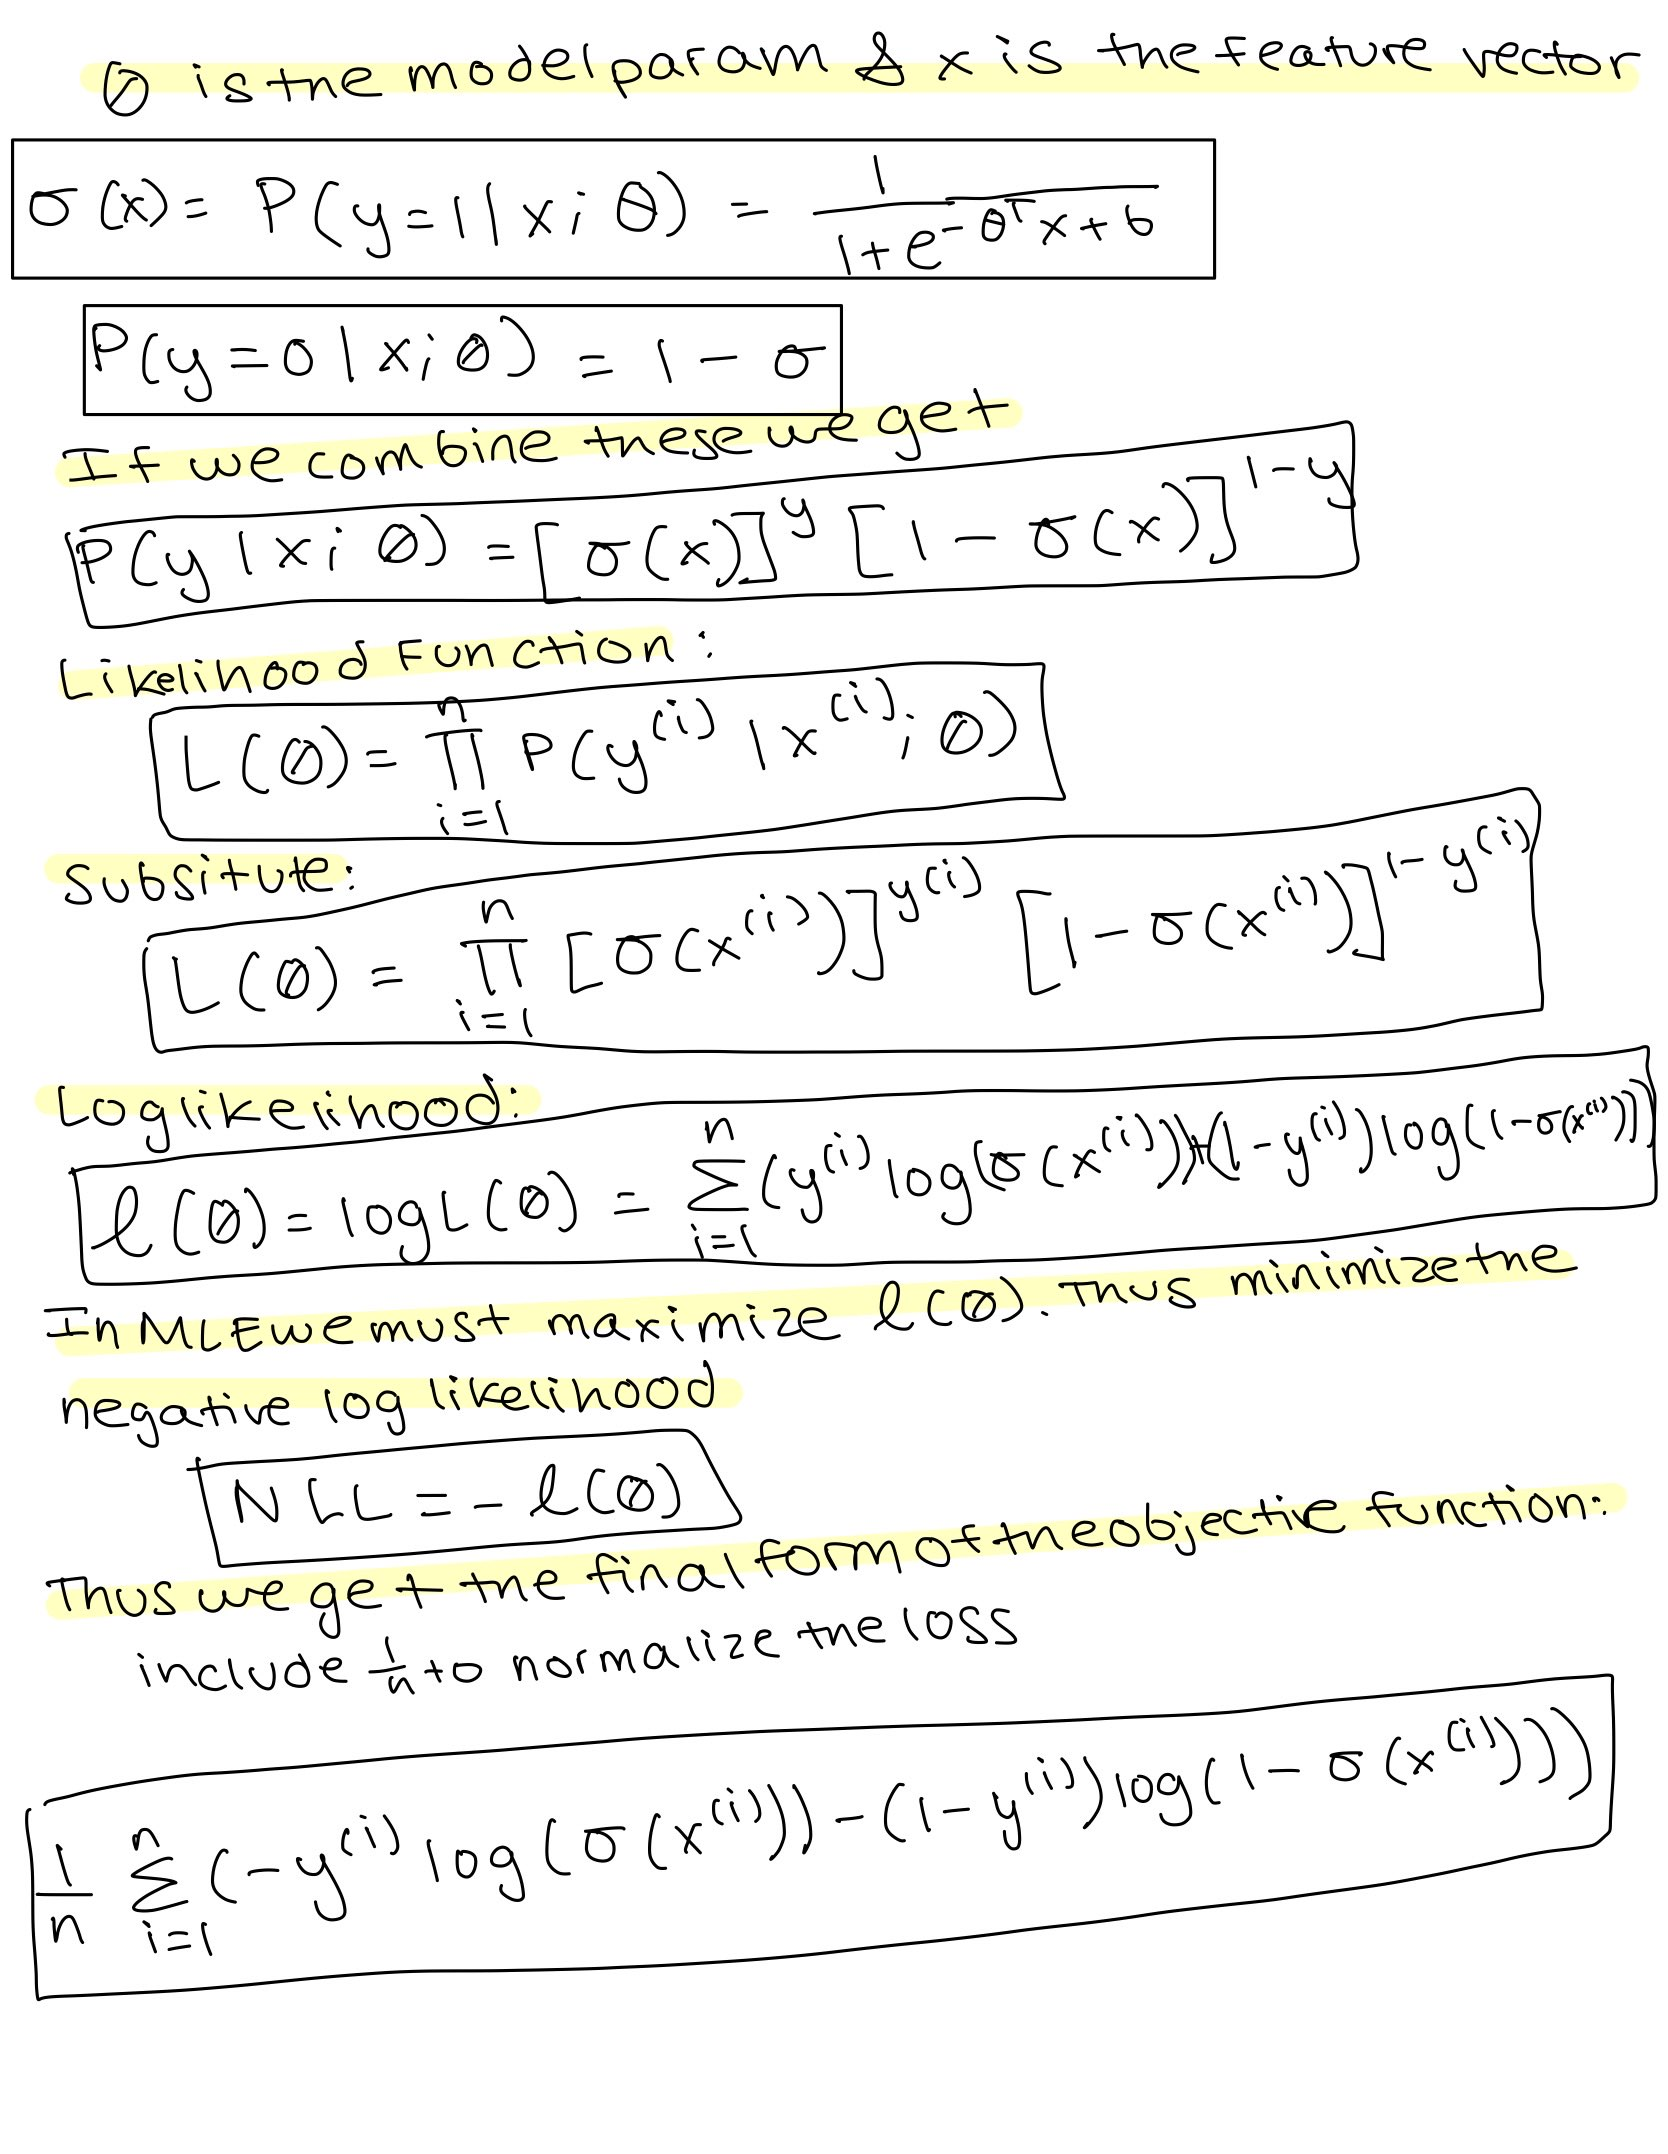
The MAP (Maximum A Posteriori) technique for logistic regression extends MLE by incorporating prior beliefs about the parameters *w* and *b*. However, MLE has no prior knowledge of parameters and soley is informed by the likelihood. The MAP estimate is a form of Bayesian inference due to its reliance on likelihood and prior knowledge. Thus MLE is suited for large datasets where prior knowledge is unnecessary while MAP is preferred for small datasets or when domain knowledge provides meaningful priors.
Used this website to help derivation:
[Link](https://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression/#:~:text=Objective%20Function%20--%20Log-Likelihood&text=under%20the%20assumption%20that%20the%20training%20samples%20are%20independent%20of%20each%20other.&text=One%20advantage%20of%20taking%20the,math)

2. Machine Learning Problem: Email Spam/Junk Detection
The goal for this problemis to classify which emails are either spam (y = 1) or not spam (y = 0) based on features extracted from the email content. Features could include:
  *   Frequency of spam typical words (free, win)
  *   Email length and attachment size
  *   Presence of special characters

  Logistic regression is the best choice for this problem because it is designed for binary classification making it a goof fit for spam detection. Logstic Regression also provides probabilities for each class thus enabling threshold adjustments. In addition logistic regression is computationally efficient and simple.

  Lets compare Logistic regression to another linear classification Model like Support Vector Machines (SVM). SVMs are also used for binary classification however they try to maximize the margin between the closest  support vectors whereas logisitc regression maximize the posterior class probability. While SVMs might offer better performance in certain scenarios they are computationally expensive and harder to interpret.

  Used this [link](https://www.geeksforgeeks.org/differentiate-between-support-vector-machine-and-logistic-regression/) to see SVM vs logstic regrassion comparission.


3. How does the dataset correspond to the variables in the equations

 y = 1: The email is spam
 y = 0: The email is not spam

 x = [x1, x2 ... xn]: represents the features exrtacted from each email

 theta vector: represents the weights or coefficients learned by the model for each feature

 sigma(x): is the hypothesis function that computes the probability of an email being spam based on the feature vector x and the model parameter theta.

**Task 3: Dataset and Advanced EDA**

1. The data set I chose contains attributes of animal bite incidents reported and investigated by Lousiville Metro Department of Public health and Wellness. https://www.kaggle.com/datasets/rtatman/animal-bites



2. Exploratory Data Analysis

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Health_AnimalBites.csv')
# Read the first few lines of the data
print(data.head())

             bite_date SpeciesIDDesc BreedIDDesc GenderIDDesc       color  \
0  1985-05-05 00:00:00           DOG         NaN       FEMALE  LIG. BROWN   
1  1986-02-12 00:00:00           DOG         NaN      UNKNOWN   BRO & BLA   
2  1987-05-07 00:00:00           DOG         NaN      UNKNOWN         NaN   
3  1988-10-02 00:00:00           DOG         NaN         MALE   BLA & BRO   
4  1989-08-29 00:00:00           DOG         NaN       FEMALE     BLK-WHT   

   vaccination_yrs     vaccination_date victim_zip AdvIssuedYNDesc  \
0              1.0  1985-06-20 00:00:00      40229              NO   
1              NaN                  NaN      40218              NO   
2              NaN                  NaN      40219              NO   
3              NaN                  NaN        NaN              NO   
4              NaN                  NaN        NaN              NO   

  WhereBittenIDDesc      quarantine_date DispositionIDDesc head_sent_date  \
0              BODY  1985-05-05 00:00:0

This data has some missing values or some UNKNOWN information. This will be dealt with in the data cleaning section.

In [ ]:
#Get the shape of the data
print(data.shape)

(9003, 15)


In [ ]:
#Get general information about the data

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB
None


In [ ]:
# Get descriptions and statistics of data
# Only vaccination years is showing because it is the only numeric value
print(data.describe())

       vaccination_yrs
count      3738.000000
mean          1.452113
std           0.848416
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000


In [ ]:
# Data Cleaning
# Convert date columns to datetime
date_columns = ['bite_date', 'vaccination_date', 'quarantine_date', 'release_date', 'head_sent_date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Drop columns with excessive missing data or irrelevant for multicollinearity analysis'
columns_to_drop = ['head_sent_date', 'release_date', 'DispositionIDDesc']
data_cleaned = data.drop(columns=columns_to_drop)

# Encode categorical columns using LabelEncoder for simplicity
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna('Missing')  # Replace NaN with 'Missing' for encoding


# Handle numerical columns with missing values (e.g., vaccination_yrs)
data_cleaned['vaccination_yrs'] = data_cleaned['vaccination_yrs'].fillna(data_cleaned['vaccination_yrs'].mean())

# Check the processed dataset
data_cleaned.info(), data_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8685 non-null   datetime64[ns]
 1   SpeciesIDDesc      9003 non-null   object        
 2   BreedIDDesc        9003 non-null   object        
 3   GenderIDDesc       9003 non-null   object        
 4   color              9003 non-null   object        
 5   vaccination_yrs    9003 non-null   float64       
 6   vaccination_date   4115 non-null   datetime64[ns]
 7   victim_zip         9003 non-null   object        
 8   AdvIssuedYNDesc    9003 non-null   object        
 9   WhereBittenIDDesc  9003 non-null   object        
 10  quarantine_date    2020 non-null   datetime64[ns]
 11  ResultsIDDesc      9003 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 844.2+ KB


(None,
    bite_date SpeciesIDDesc BreedIDDesc GenderIDDesc       color  \
 0 1985-05-05           DOG     Missing       FEMALE  LIG. BROWN   
 1 1986-02-12           DOG     Missing      UNKNOWN   BRO & BLA   
 2 1987-05-07           DOG     Missing      UNKNOWN     Missing   
 3 1988-10-02           DOG     Missing         MALE   BLA & BRO   
 4 1989-08-29           DOG     Missing       FEMALE     BLK-WHT   
 
    vaccination_yrs vaccination_date victim_zip AdvIssuedYNDesc  \
 0         1.000000       1985-06-20      40229              NO   
 1         1.452113              NaT      40218              NO   
 2         1.452113              NaT      40219              NO   
 3         1.452113              NaT    Missing              NO   
 4         1.452113              NaT    Missing              NO   
 
   WhereBittenIDDesc quarantine_date ResultsIDDesc  
 0              BODY      1985-05-05       UNKNOWN  
 1              BODY      1986-02-12       UNKNOWN  
 2              BODY

This code uses statsmodels to calculate VIF. The code then identified featured with VIF exceeding the threshold (10) and removes the feature with the highest VIF in each iteration until all the VIF values are below the threshold. It then combines this new reduced numerical data with data_cleaned.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = []
    for i in range(df.shape[1]):
      vif_data["VIF"].append(variance_inflation_factor(df.values, i))

    return vif_data


# Calculate VIF
vif_result = calculate_vif(data_cleaned)
print("Initial VIF Results:\n", vif_result)

# Remove highly correlated variables iteratively (e.g., VIF > 10)
threshold = 10
while True:
    vif_result = calculate_vif(data_cleaned)
    max_vif = vif_result['VIF'].max()
    if max_vif > threshold:

        drop_column = vif_result.loc[vif_result['VIF'].idxmax(), 'feature']
        print(f"Dropping '{drop_column}' with VIF={max_vif}")
        data_cleaned = data_cleaned.drop(columns=[drop_column])
    else:
        break

print("Final VIF Results:\n", vif_result)

# Final cleaned dataset with reduced multicollinearity
data_final = pd.concat([data_cleaned.drop(columns=numerical_columns), data_cleaned], axis=1)


Initial VIF Results:
              feature       VIF
0      SpeciesIDDesc  6.083299
1        BreedIDDesc  9.472442
2       GenderIDDesc  3.214012
3              color  3.953441
4    vaccination_yrs  6.559436
5         victim_zip  5.714470
6    AdvIssuedYNDesc  1.944559
7  WhereBittenIDDesc  1.397843
8      ResultsIDDesc  1.674052
Dropping 'BreedIDDesc' with VIF=9.47244247252681
Final VIF Results:
              feature       VIF
0      SpeciesIDDesc  5.640529
1       GenderIDDesc  3.146090
2              color  3.785372
3    vaccination_yrs  5.877272
4         victim_zip  5.115051
5    AdvIssuedYNDesc  1.920426
6  WhereBittenIDDesc  1.390942
7      ResultsIDDesc  1.651967


In order to identify highly correlated varaibles I used Variance Inflation Factor (VIF). I had a the threshold set to 10, and thus identified BreedIDDesc. In order to handle these highly correlated variables, it is good practice to remove the feature.

3. Visualize the dataset's feature relationships.

bite_date
2001.0       1
2002.0       1
2007.0       1
2009.0      14
2010.0    1131
2011.0    1148
2012.0    1180
2013.0    1145
2014.0    1176
2015.0     985
2016.0    1051
2017.0     801
2018.0       1
2020.0       1
2021.0       1
Name: count, dtype: int64


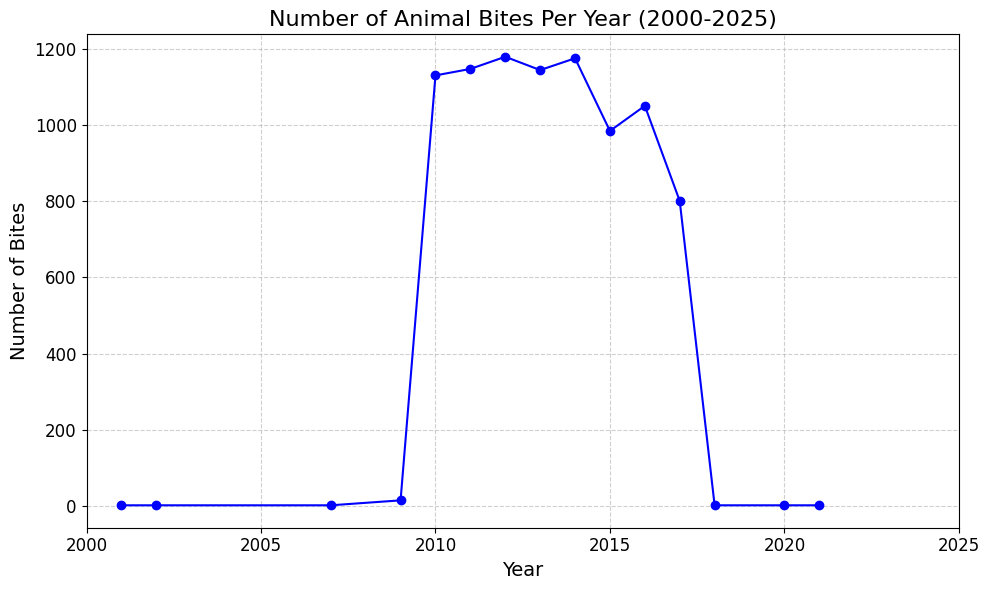

In [6]:
# Making graph to see how many bites per year there was

data_cleaned['bite_date'] = pd.to_datetime(data_cleaned['bite_date'], errors='coerce')

bites_per_year = data_cleaned['bite_date'].dt.year.value_counts().sort_index()

bites_per_year = bites_per_year[(bites_per_year.index >= 2000) & (bites_per_year.index <= 2025)]

print(bites_per_year)

plt.plot(bites_per_year.index, bites_per_year.values, marker='o', linestyle='-', color='b')
plt.show()


GenderIDDesc
MALE       3832
UNKNOWN    3155
FEMALE     2016
Name: count, dtype: int64


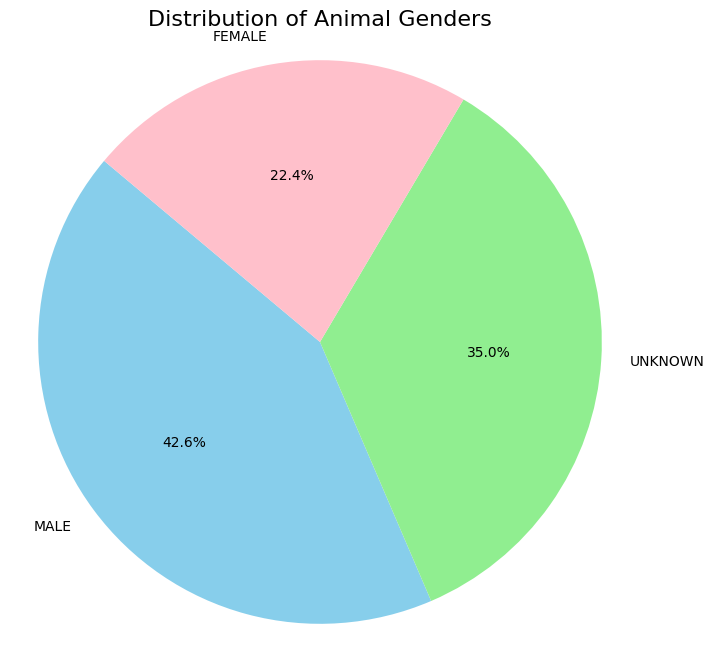

In [5]:
#Plotting graph of Male vs Female bites
data_cleaned['GenderIDDesc'] = data['GenderIDDesc'].fillna('UNKNOWN')

# Count the number of bites by gender
gender_counts = data_cleaned['GenderIDDesc'].value_counts()

print (gender_counts)

# Plot the bar chart

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'pink', 'gold'])

plt.show()


SpeciesIDDesc
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: count, dtype: int64


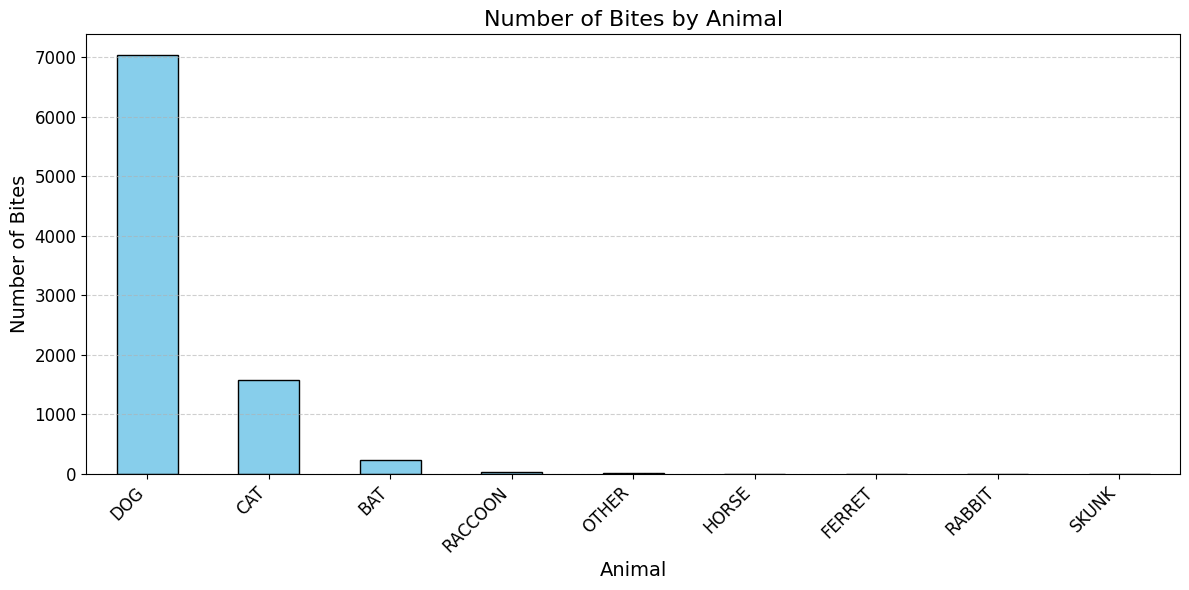

In [4]:
data_filtered = data[~data['SpeciesIDDesc'].str.contains("Missing", na=False, case=False)]
#Plotting graph of breeds
top_animals = data_filtered['SpeciesIDDesc'].value_counts().head(10)

print(top_animals)

# Plot the bar chart
top_animals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.show()

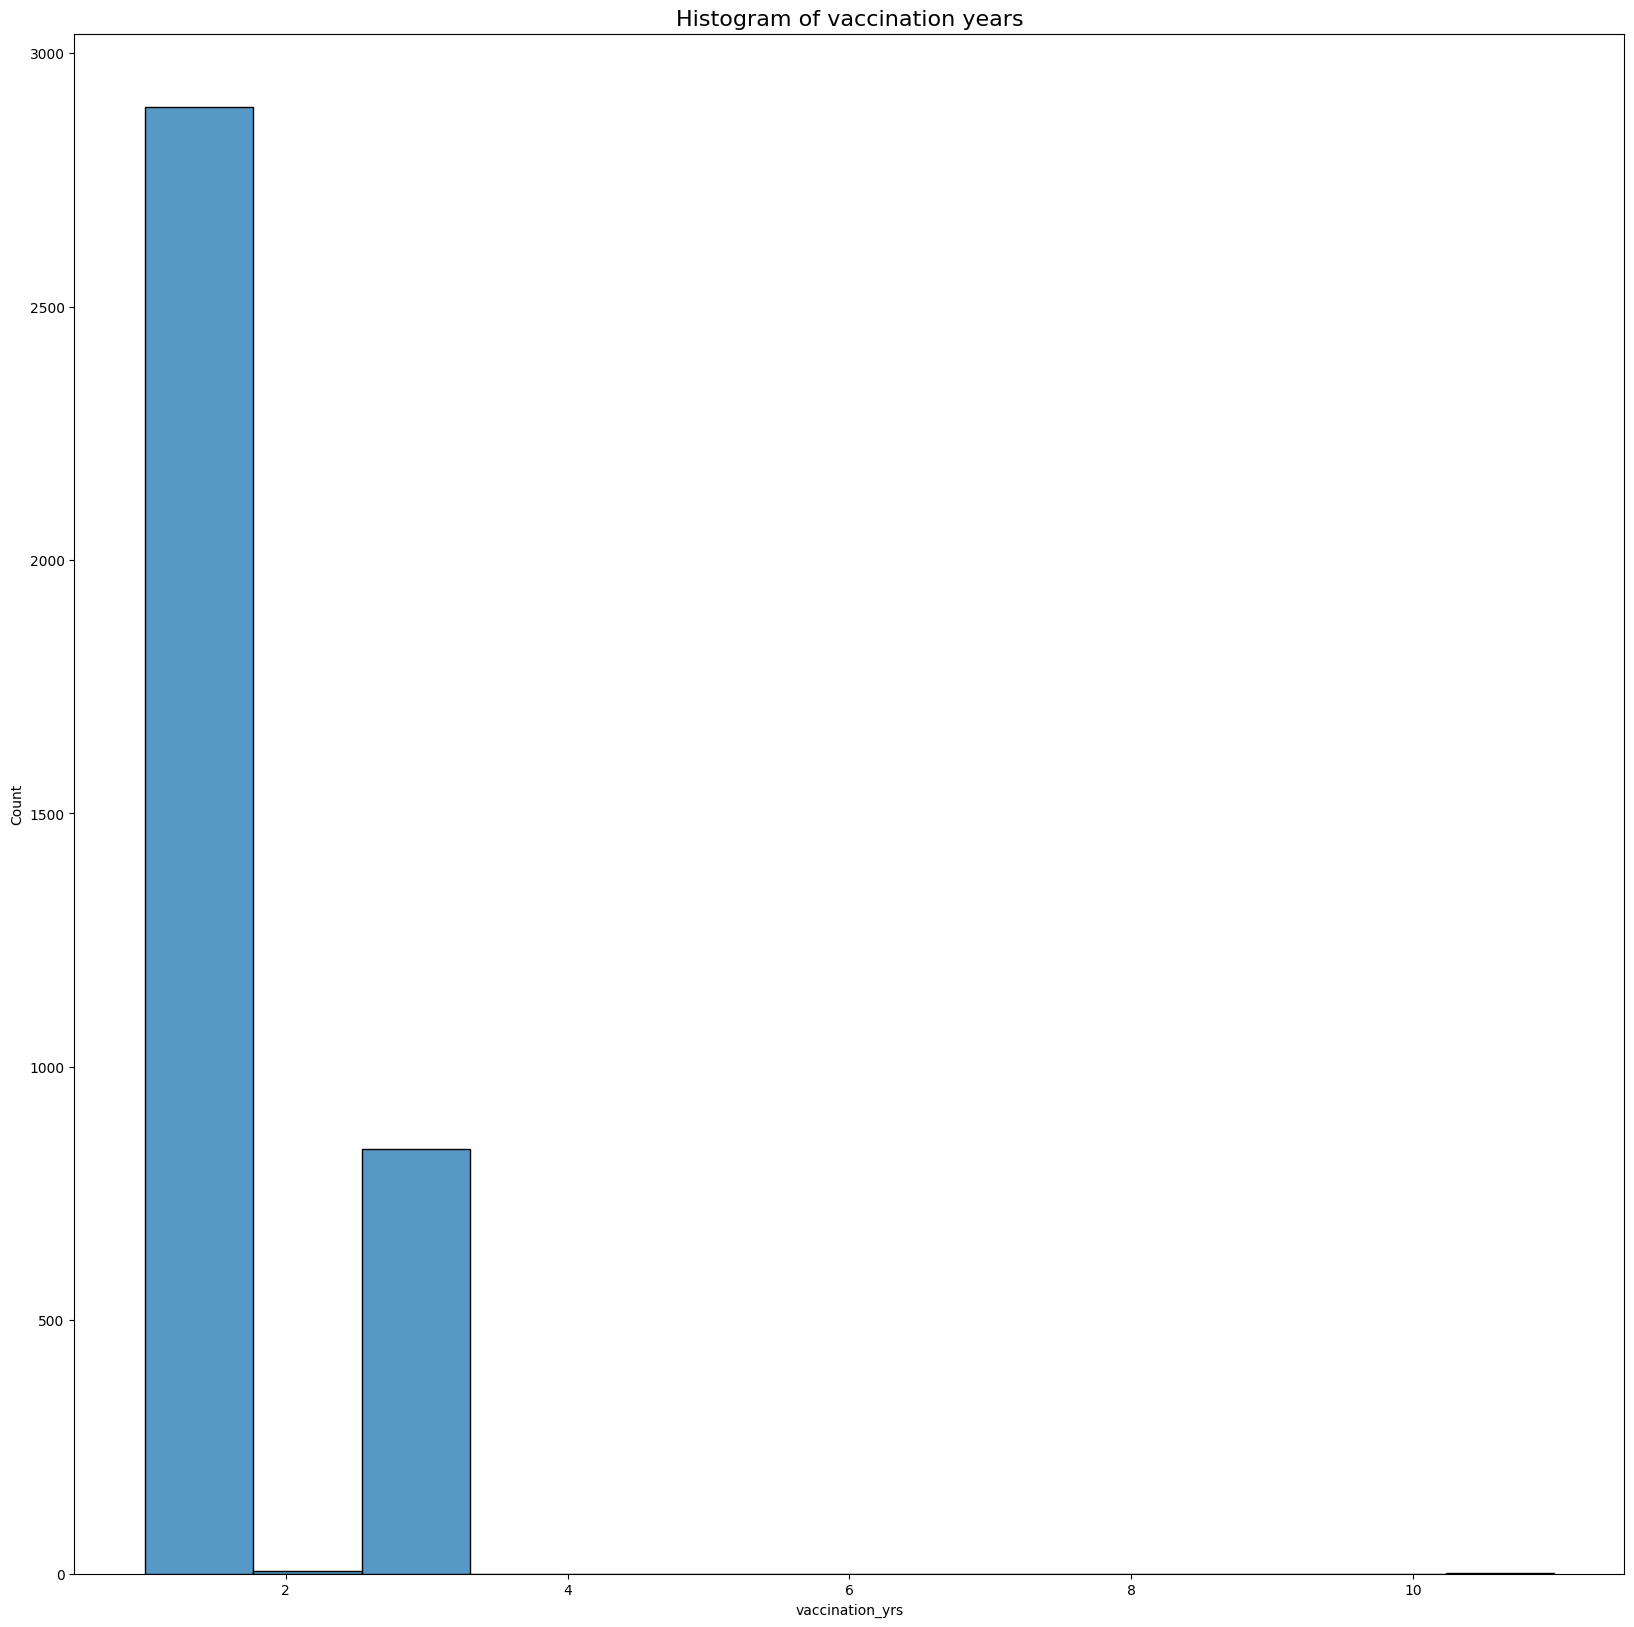

In [9]:
import seaborn as sns
# Handle numerical columns with missing values (e.g., vaccination_yrs)
data_cleaned['vaccination_yrs'] = data_cleaned['vaccination_yrs'].fillna(data_cleaned['vaccination_yrs'].mean())

sns.histplot(data['vaccination_yrs'])

plt.show()

After performing EDA, VIF and multiple visualization techniques I realized that my data isn't the best. The quality of the data is lacking because of the vast amount of missing or unknown data. In addition, there is only one numerical feature so there were a lot of visualization techniques I missed out on. Lastly the quality of the features was also not the best, seeing that a lot of the information was redundant or unhelpful.

**Task 3: Logistic Regression Implementation**

1. Implement Logistic Regression from scratch

In [ ]:
import numpy as np

def compute_cost(y, y_hat):
    # input of actual y values and predicted y values
    m = y.shape[0]
    cost = -(1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

def logistic_regression(X, y, learning_rate=0.01, iterations=1000):

    # initializes weights and bias to zero
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(iterations):
        # Compute linear predictions and apply sigmoid function
        z = np.dot(X, weights) + bias
        y_hat = 1 / (1 + np.exp(-z))

        # Compute the gradients
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict(X, weights, bias):
    # Predict binary class labels for given data.
    # Uses weight, bias tuples outputed in logisitic regression function
    z = np.dot(X, weights) + bias
    y_hat = 1 / (1 + np.exp(-z))
    return (y_hat >= 0.5).astype(int)



2. Implement and Compare gradient descent variants.

In [ ]:
def batch_gradient_descent(X, y, learning_rate, iterations):
   # input X is a feature matrix and learning rate is step size for weight updates
   # initializes weights and bias to zero
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(iterations):
        # Linear combination of inputs and weights,
        #then apply sigmoid to get the probabilities
        z = np.dot(X, weights) + bias
        y_hat = 1 / (1 + np.exp(-z))

        # Computing gradients for weights and bias
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)

        # Update the weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias # returning tuple of updated weights and bias

def stochastic_gradient_descent(X, y, learning_rate, iterations):

    # Same set up as batch gradient descent
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(iterations):
        for i in range(m):
            #Choose a single datapoint
            xi = X[i].reshape(1, -1)
            yi = y[i]

            # Lineat prediction and apply the sigmoid
            z = np.dot(xi, weights) + bias
            y_hat = 1 / (1 + np.exp(-z))

            # Compute gradients for the single data point
            dw = np.dot(xi.T, (y_hat - yi))
            db = y_hat - yi

            # Update weights and bias
            weights -= learning_rate * dw.ravel()
            bias -= learning_rate * db

    return weights, bias

def mini_batch_gradient_descent(X, y, learning_rate, iterations, batch_size):
    # Input batch size is the size of each mini-batch

    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(iterations):
        # Shuffling indices
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            # Select a mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Linear predictions for the mini-batch and apply the sigmoid
            z = np.dot(X_batch, weights) + bias
            y_hat = 1 / (1 + np.exp(-z))

            # Compute gradients for the mini-batch
            dw = (1 / X_batch.shape[0]) * np.dot(X_batch.T, (y_hat - y_batch))
            db = (1 / X_batch.shape[0]) * np.sum(y_hat - y_batch)

            # Update weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

    return weights, bias



Explain the convergence properties of the threww gradient descent variants with respect to your cost function.

1. Batch Gradient descent processes the entire dataset to compute gradients in each iteration, it typically converges smoothly but can be slow for large datasets

2. Stochastic Gradient Descent processes one training example at a time. This allows for faster updates but has high variance leading to a noiser convergence.

3. Mini-batch gradient descent processes small random batches of data in each iteration. This method balances between the stability of batch gradient descent and the speed of stochastic gradient descent.



**Task 4: Optimization Techniques and Advanced Comparison**

1. Implement any 3 optimization algorithms.

I used this [link](https://artemoppermann.com/optimization-in-deep-learning-adagrad-rmsprop-adam/) to learn more about the optimization algorithms

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 41.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.32MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.7MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.22MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training with SGD
SGD - Epoch 1, Loss: 12682.8272, Accuracy: 64.15%
SGD - Epoch 2, Loss: 1434.7072, Accuracy: 58.55%
SGD - Epoch 3, Loss: 1112.8048, Accuracy: 69.09%
SGD - Epoch 4, Loss: 975.7812, Accuracy: 66.86%
SGD - Epoch 5, Loss: 885.5176, Accuracy: 70.37%
SGD - Epoch 6, Loss: 815.8161, Accuracy: 71.37%
SGD - Epoch 7, Loss: 763.4214, Accuracy: 77.17%
SGD - Epoch 8, Loss: 716.9122, Accuracy: 75.75%
SGD - Epoch 9, Loss: 680.5239, Accuracy: 76.93%
SGD - Epoch 10, Loss: 651.4066, Accuracy: 80.73%
Training with SGD with Momentum
SGD with Momentum - Epoch 1, Loss: 879.9143, Accuracy: 80.75%
SGD with Momentum - Epoch 2, Loss: 605.8048, Accuracy: 84.66%
SGD with Momentum - Epoch 3, Loss: 504.0311, Accuracy: 86.47%
SGD with Momentum - Epoch 4, Loss: 445.1197, Accuracy: 88.65%
SGD with Momentum - Epoch 5, Loss: 403.5338, Accuracy: 89.37%
SGD with Momentum - Epoch 6, Loss: 378.8076, Accuracy: 89.87%
SGD with Momentum 

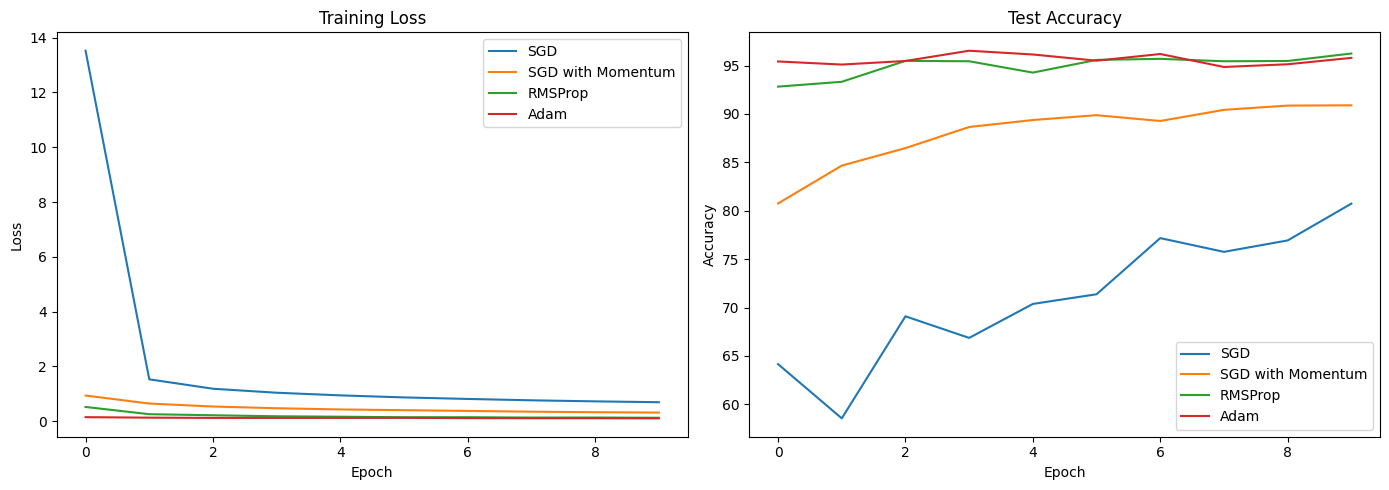

In [10]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 64
epochs = 10
learning_rate = 0.01
input_size = 784
hidden_size1 = 128
hidden_size2 = 64
output_size = 10

# Dataset and DataLoader
transform = transforms.ToTensor()

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize weights and biases for the neural network
weights1 = torch.randn(input_size, hidden_size1).detach().requires_grad_(True)
bias1 = torch.zeros(hidden_size1).detach().requires_grad_(True)

weights2 = torch.randn(hidden_size1, hidden_size2).detach().requires_grad_(True)
bias2 = torch.zeros(hidden_size2).detach().requires_grad_(True)

weights3 = torch.randn(hidden_size2, output_size).detach().requires_grad_(True)
bias3 = torch.zeros(output_size).detach().requires_grad_(True)


# Forward pass function
def forward(x):
    x = x.view(-1, input_size)  # Flatten the input
    hidden1 = F.relu(x @ weights1 + bias1)  # First hidden layer
    hidden2 = F.relu(hidden1 @ weights2 + bias2)  # Second hidden layer
    output = hidden2 @ weights3 + bias3  # Output layer
    return output

# Train and evaluate function
def train_and_evaluate(optimizer_name, optimizer):
    train_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        # Training phase
        epoch_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Reset gradients
            outputs = forward(images)  # Forward pass
            loss = F.cross_entropy(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights and biases

            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        # Evaluation phase
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = forward(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_accuracies.append(test_accuracy)

        print(f"{optimizer_name} - Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

    return train_losses, test_accuracies

# Optimizers to Compare
optimizers = {
    "SGD": optim.SGD([weights1, bias1, weights2, bias2, weights3, bias3], lr=learning_rate),
    "SGD with Momentum": optim.SGD([weights1, bias1, weights2, bias2, weights3, bias3], lr=learning_rate, momentum=0.9),
    "RMSProp": optim.RMSprop([weights1, bias1, weights2, bias2, weights3, bias3], lr=learning_rate),
    "Adam": optim.Adam([weights1, bias1, weights2, bias2, weights3, bias3], lr=learning_rate)
}

# Train and Compare
results = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name}")
    results[name] = train_and_evaluate(name, optimizer)


plt.figure(figsize=(14, 5))
# Plot Training Loss
plt.subplot(1, 2, 1)
for name, (losses, _) in results.items():
    plt.plot(losses, label=name)

# Plot Test Accuracy
plt.subplot(1, 2, 2)
for name, (_, accuracies) in results.items():
    plt.plot(accuracies, label=name)

plt.show()


Compare the performance of the algorithms with the vanilla stochastic gradient descent.

As we can see in the graphs the vanilla stochastic gradient descent has a worse performance that the rest of the algorithms. The training loss graph shows us that for the first epoch SGD struggled to learn the training data. In addition the test accuracy of the SGD is significantly lower than the other algorithms.

2. Define and use mulitple evaluation metrics

Training with SGD
SGD - Epoch 1, Loss: 13968.1904, Accuracy: 68.04%, Precision: 0.70, Recall: 0.68, F1 Score: 0.67
SGD - Epoch 2, Loss: 1624.6357, Accuracy: 67.44%, Precision: 0.69, Recall: 0.67, F1 Score: 0.66
SGD - Epoch 3, Loss: 1123.5976, Accuracy: 68.15%, Precision: 0.72, Recall: 0.68, F1 Score: 0.67
SGD - Epoch 4, Loss: 960.0872, Accuracy: 69.73%, Precision: 0.74, Recall: 0.70, F1 Score: 0.69
SGD - Epoch 5, Loss: 868.8886, Accuracy: 76.43%, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
SGD - Epoch 6, Loss: 802.6155, Accuracy: 75.96%, Precision: 0.78, Recall: 0.76, F1 Score: 0.76
SGD - Epoch 7, Loss: 749.6266, Accuracy: 77.62%, Precision: 0.79, Recall: 0.78, F1 Score: 0.77
SGD - Epoch 8, Loss: 703.3979, Accuracy: 80.78%, Precision: 0.81, Recall: 0.81, F1 Score: 0.81
SGD - Epoch 9, Loss: 670.1007, Accuracy: 79.63%, Precision: 0.81, Recall: 0.80, F1 Score: 0.80
SGD - Epoch 10, Loss: 641.9041, Accuracy: 81.32%, Precision: 0.82, Recall: 0.81, F1 Score: 0.81
Training with SGD with Mome

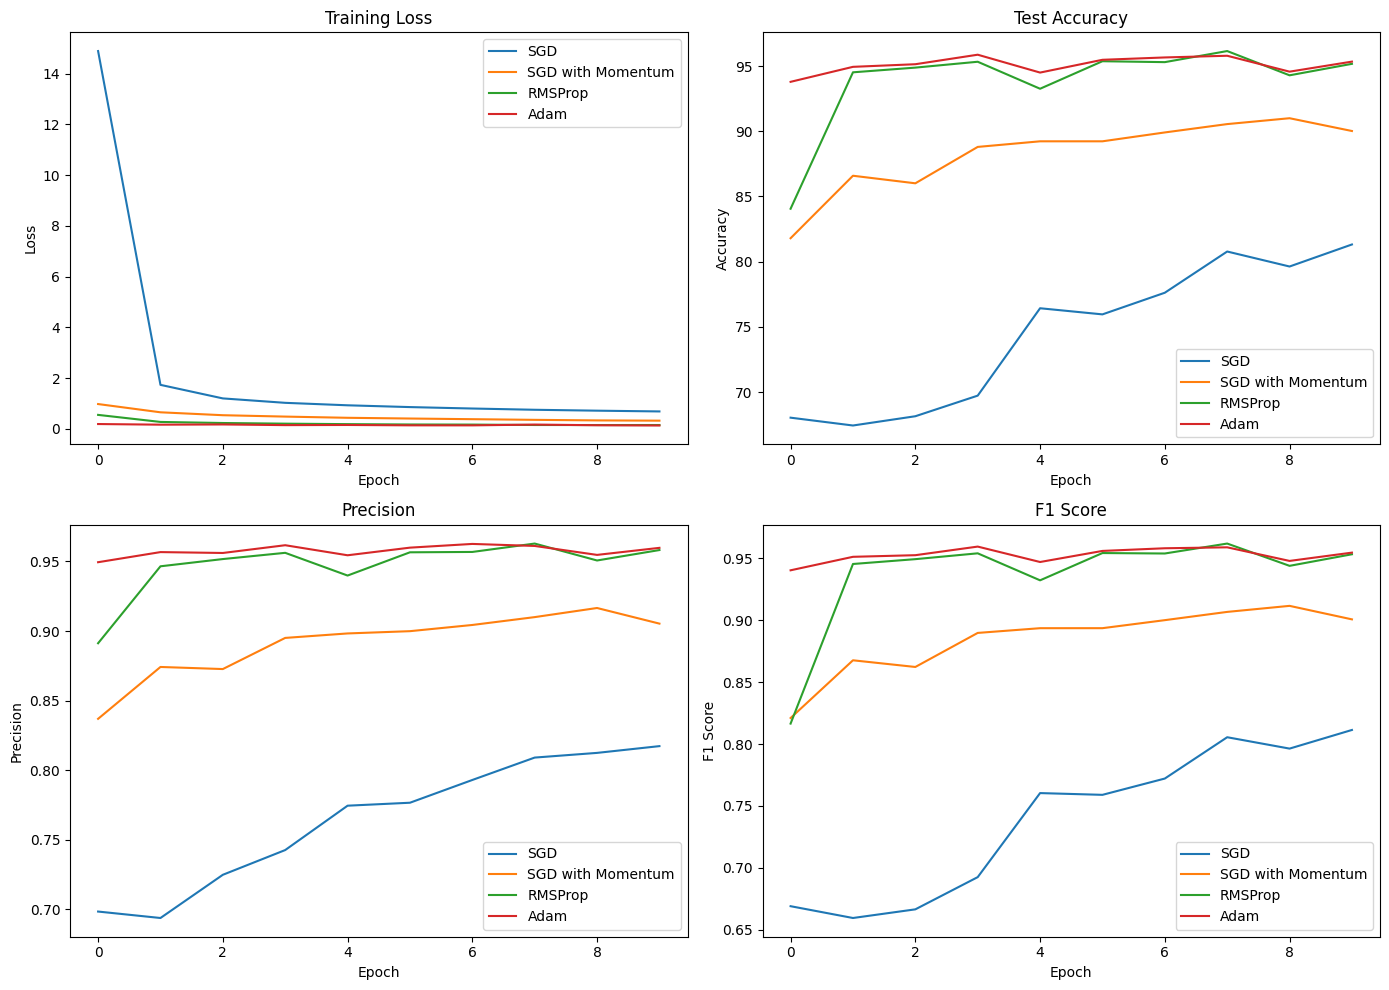

In [11]:

from sklearn.metrics import precision_score, recall_score, f1_score

# Train and evaluate function
def train_and_evaluate(optimizer_name, optimizer):
    train_losses = []
    test_accuracies = []
    test_precisions = []
    test_recalls = []
    test_f1_scores = []

    for epoch in range(epochs):
        # Training phase
        epoch_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Reset gradients

            outputs = forward(images)  # Forward pass
            loss = F.cross_entropy(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights and biases

            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        # Evaluation phase
        all_predictions = []
        all_labels = []
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                outputs = forward(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                all_predictions.extend(predicted.tolist())
                all_labels.extend(labels.tolist())

        # Calculate metrics
        accuracy = 100 * correct / total
        precision = precision_score(all_labels, all_predictions, average='weighted')
        recall = recall_score(all_labels, all_predictions, average='weighted')
        f1 = f1_score(all_labels, all_predictions, average='weighted')

        test_accuracies.append(accuracy)
        test_precisions.append(precision)
        test_recalls.append(recall)
        test_f1_scores.append(f1)

        print(f"{optimizer_name} - Epoch {epoch+1}, "
              f"Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%, "
              f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    return train_losses, test_accuracies, test_precisions, test_recalls, test_f1_scores

# Optimizers to Compare
optimizers = {
    "SGD": optim.SGD([weights1, bias1, weights2, bias2, weights3, bias3], lr=learning_rate),
    "SGD with Momentum": optim.SGD([weights1, bias1, weights2, bias2, weights3, bias3], lr=learning_rate, momentum=0.9),
    "RMSProp": optim.RMSprop([weights1, bias1, weights2, bias2, weights3, bias3], lr=learning_rate),
    "Adam": optim.Adam([weights1, bias1, weights2, bias2, weights3, bias3], lr=learning_rate)
}

# Train and Compare
results = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name}")
    results[name] = train_and_evaluate(name, optimizer)

plt.figure(figsize=(14, 10))
# Plot Training Loss
plt.subplot(2, 2, 1)
for name, (losses, _, _, _, _) in results.items():
    plt.plot(losses, label=name)


# Plot Test Accuracy
plt.subplot(2, 2, 2)
for name, (_, accuracies, _, _, _) in results.items():
    plt.plot(accuracies, label=name)


# Plot Precision
plt.subplot(2, 2, 3)
for name, (_, _, precisions, _, _) in results.items():
    plt.plot(precisions, label=name)


# Plot F1 Score
plt.subplot(2, 2, 4)
for name, (_, _, _, _, f1_scores) in results.items():
    plt.plot(f1_scores, label=name)

plt.show()


3. Perform a hyperparameter tuning process for each algorithm and assess its impact on performance

I used this [link](https://www.geeksforgeeks.org/hyperparameter-tuning/) to see some techniques

For the following code I had to reduce the epochs due to the 30 minute run time.
I also kept getting this warning:

In [ ]:
 UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

So I imported warning and filtered it so that it removed the warnings for better visualization of the output.


Performing random search for SGD...

Training SGD with params: {'lr': 0.001, 'momentum': 0.0}

Training SGD with params: {'lr': 0.01, 'momentum': 0.5}

Training SGD with params: {'lr': 0.001, 'momentum': 0.9}

Training SGD with params: {'lr': 0.001, 'momentum': 0.0}

Training SGD with params: {'lr': 0.001, 'momentum': 0.0}

Best SGD params: {'lr': 0.001, 'momentum': 0.0}
Best SGD metrics: {'accuracy': 88.03, 'precision': 0.8815885931782114, 'recall': 0.8803, 'f1_score': 0.8803955048740294}

Performing random search for RMSProp...

Training RMSProp with params: {'lr': 0.001, 'alpha': 0.999}

Training RMSProp with params: {'lr': 0.001, 'alpha': 0.9}

Training RMSProp with params: {'lr': 0.1, 'alpha': 0.999}

Training RMSProp with params: {'lr': 0.1, 'alpha': 0.999}

Training RMSProp with params: {'lr': 0.01, 'alpha': 0.999}

Best RMSProp params: {'lr': 0.001, 'alpha': 0.9}
Best RMSProp metrics: {'accuracy': 94.72, 'precision': 0.9475800196644084, 'recall': 0.9472, 'f1_score': 0.94724326

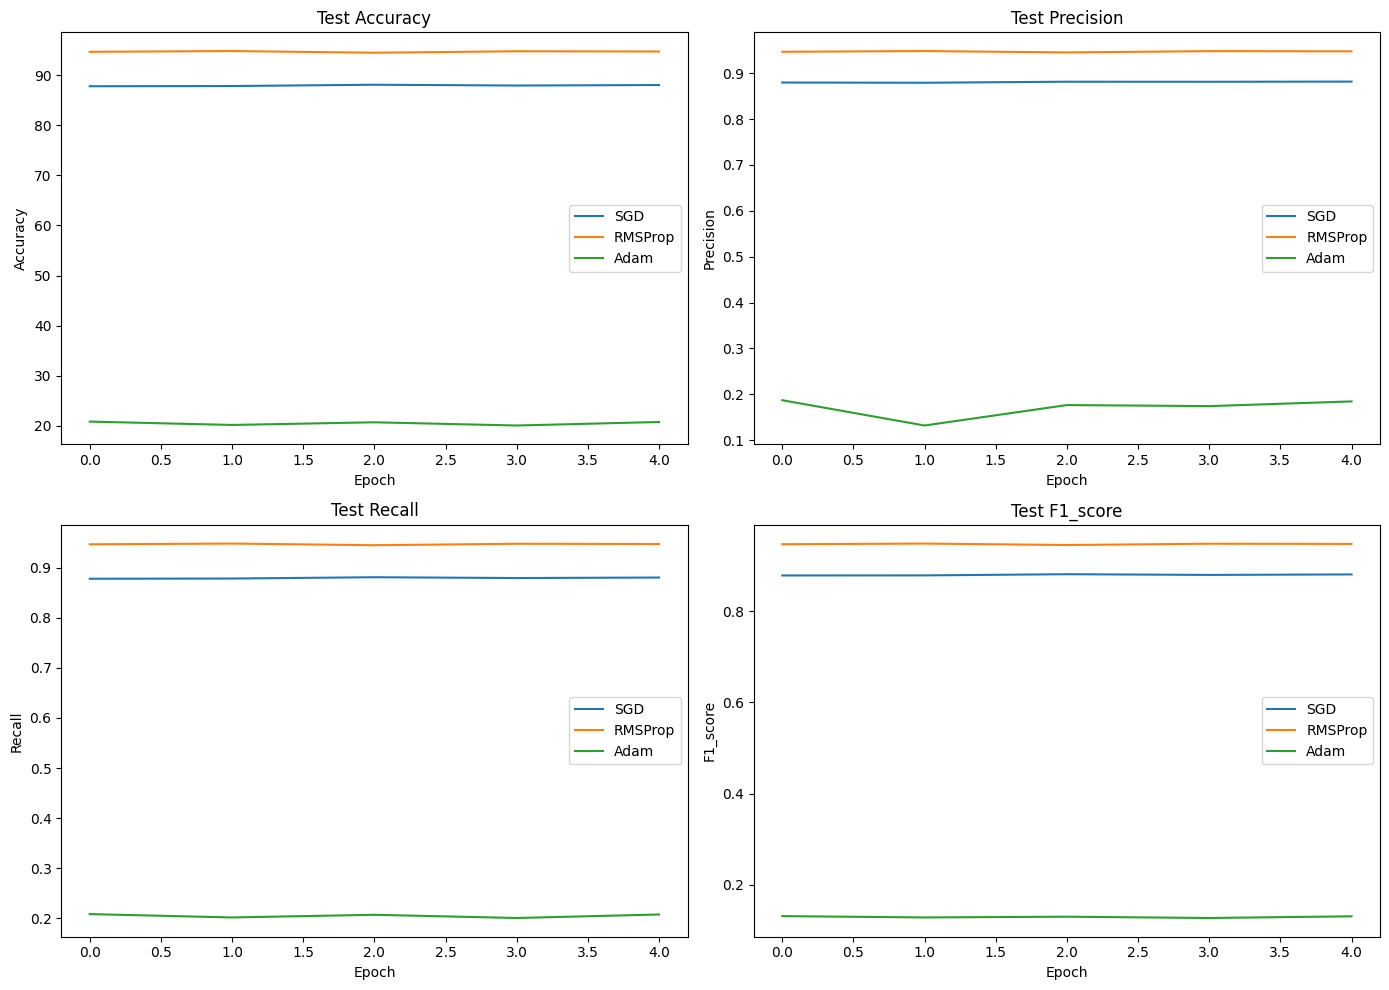

In [ ]:
import random
import warnings

warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# Define hyperparameter ranges
search_space = {
    "SGD": { "lr": [0.001, 0.01, 0.1, 0.5],"momentum": [0.0, 0.5, 0.9]},
    "RMSProp": {"lr": [0.001, 0.01, 0.1],"alpha": [0.9, 0.99, 0.999]},
    "Adam": {"lr": [0.001, 0.01, 0.1], "beta1": [0.9, 0.99],"beta2": [0.999, 0.9999]}
}


# Perform random search
def random_search(optimizer_name, num_samples=5):

    for _ in range(num_samples):
        # Randomly sample hyperparameters
        if optimizer_name == "SGD":
            params = {"lr": random.choice(search_space["SGD"]["lr"]),"momentum": random.choice(search_space["SGD"]["momentum"])}
            optimizer = optim.SGD([weights1, bias1, weights2, bias2, weights3, bias3],lr=params["lr"], momentum=params["momentum"])
        elif optimizer_name == "RMSProp":
            params = {"lr": random.choice(search_space["RMSProp"]["lr"]), "alpha": random.choice(search_space["RMSProp"]["alpha"])}
            optimizer = optim.RMSprop([weights1, bias1, weights2, bias2, weights3, bias3],
                                      lr=params["lr"], alpha=params["alpha"])
        elif optimizer_name == "Adam":
            params = { "lr": random.choice(search_space["Adam"]["lr"]), "beta1": random.choice(search_space["Adam"]["beta1"]),"beta2": random.choice(search_space["Adam"]["beta2"]) }
            optimizer = optim.Adam([weights1, bias1, weights2, bias2, weights3, bias3], lr=params["lr"], betas=(params["beta1"], params["beta2"]))

        # Train and evaluate
        print(f"\nTraining {optimizer_name} with params: {params}")
        losses, accuracies, precisions, recalls, f1_scores = train_and_evaluate(optimizer_name, optimizer)
        final_metrics = {"accuracy": accuracies[-1],"precision": precisions[-1],"recall": recalls[-1],"f1_score": f1_scores[-1]}

        # Update best results
        if best_metrics is None or final_metrics["f1_score"] > best_metrics["f1_score"]:
            best_metrics = final_metrics
            best_params = params
            best_results = (losses, accuracies, precisions, recalls, f1_scores)

    return best_params, best_metrics, best_results

# Run random search for each optimizer
best_results = {}
for optimizer_name in search_space.keys():
    print(f"\nPerforming random search for {optimizer_name}...")
    best_params, best_metrics, results = random_search(optimizer_name)
    best_results[optimizer_name] = (best_params, best_metrics, results)
    print(f"\nBest {optimizer_name} params: {best_params}")
    print(f"Best {optimizer_name} metrics: {best_metrics}")

# Plot Results
plt.figure(figsize=(14, 10))

for idx, metric in enumerate(["accuracy", "precision", "recall", "f1_score"], start=1):
    plt.subplot(2, 2, idx)
    for optimizer_name, (_, _, results) in best_results.items():
        _, accuracies, precisions, recalls, f1_scores = results
        if metric == "accuracy":
            plt.plot(accuracies, label=optimizer_name)
        elif metric == "precision":
            plt.plot(precisions, label=optimizer_name)
        elif metric == "recall":
            plt.plot(recalls, label=optimizer_name)
        elif metric == "f1_score":
            plt.plot(f1_scores, label=optimizer_name)
plt.show()


It seems like the Adam optimization algorithm has poor performance in the hyperparameter tuning process. This usually isn't the case as it typically performs well in terms of accuracy, precision, recall and F1 score (this was shown in the previous parts graphs above). I used the same architecture for this code and the previous parts.

4. Conculde by discussing the practical trade-offs of the algorithms.

Vanilla SGD
- Advantages: Easy to implement and understand. Requires minimal additional storage beyond the gradients and parameters

- Disadvantages: Struggles with noisy gradients and poor learning rates. It is also sensitive to the choice of learning rate and lacks built-in mechanisms to adjust it dynamically (manual hyperparameter tuning).

- Suitability: This algorithm is best for small to medium-scale problems where computational resources are limited. It is computationally less expensive for each step but can require more epochs.


SGD with Momentum

- Advantages: Reduces oscillations and accelerates convergence in the direction of consistent gradients. Adds a single hyperparameter to SGD making it easy and straightforward to use.

- Disadvantages: It requires careful tuning of both the learning rate and the momentum coefficient. In addition, it needs storage for velocity terms for each parameter.

- Suitability: This algorithm is best for moderately complex datasets, especially where the oscillations in gradients are a problem. It is computationally affordable but requires additional tuning compared to vanilla SGD.

RMS Prop

- Advantages: It scales learning rates for each parameter based on recent gradient magnitudes ( thus helping with non-stationary objectives). In addition it performs well for problems with noisy or less gradients.

- Disadvantages: The performance is sensitive to the choice of the decay rate and learning rate. It is also has a little more computational overhead due to maintaining the moving averages of gradients.

- Suitability: This algorithm works well on small to medium-scale datasets, especially for deep learning provlems with non-convex loss surfaces. In addition to natural language processing tasks due to its effectivness in handling sparse data.

Adam

- Advanatages: Combines the benefits of Momentum and RMSProp by adjusting learning rates dynamically while incorporating moving averages of gradients. It also achieves faster convergence compared to SGD variants.

- Disadvantages: It requires more memory and computation due to maintaining moving averages. It can also lead to overfitting if not regularized properly.

- Suitability: This algorithm works best with large-scale datasets and complex neural networls wjere computational resources are sufficient. It is also commonly used more modern deep learning tasks such as computer vision.